## Business Objective

The first and foremost objective of this project is to build the classification model for the Road Safety UK dataset 2020 The model are build keeping accident severity as the Target variable three classes of severity are Fatal,Serious and slightThis model is supposed to be able to.  predict the likelihood of this accident being a severe one or slight or serious.We are trying to build a model to predict the accident severity for the National Highway Authority of United Kingdom. So that they can take effective measures to controll the severity of accidents and lower down the number of accidents.

Yhe algorithm used in bilding the classification model are:

1. Decision Tree Classfier
2. Random Forest
3. Random Forest Using OverSampling
4. Random Forest Using Randomized CV
5. Support Vecto Classifier
6. Multinomial Logistic Regression

The aim is to check the accuracy of the model on Training and test data, to understand the prediction power of model, so in future based on predictors whether model will be able to determine the severity of the accident

In [242]:
# Importing the base Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns  # viz
from IPython.display import HTML, display
pd.set_option("display.max_columns",None)
import plotly.express as px
import os
import urllib
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Exporting the Trainset and Test Set

In [243]:
train_set=pd.read_csv("trainset.csv")
test_set=pd.read_csv("testset.csv")

In [244]:
train_set.head()

,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,speed_limit,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_One way street,road_type_Roundabout,road_type_Single Carriageway,road_type_Sliproad,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_detail_unknown (self reported),pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,pedestrian_crossing_physical_facilities_unknown (self reported),light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,weather_conditions_Unknown,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_surface_conditions_unknown (self reported),day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,-0.450211,2.585797,Slight,0.226076,1.090620,2.463687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.731058,0.282439,Slight,0.226076,1.090620,1.736604,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.278252,1.125669,Slight,1.697788,-0.401056,-0.444644,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.719027,0.192249,Serious,0.226076,-0.401056,-0.444644,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.125606,-1.108035,Slight,-1.245637,1.090620,1.736604,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 1. Baseline Model

In [245]:
train_set["accident_severity"].value_counts()

Slight     51761
Serious    12901
Fatal        944
Name: accident_severity, dtype: int64

In [246]:
train_set.shape

(65606, 53)

### Checking the Precision, Recall and F score of the baseline Model

The average F-score of the model is 29 % We used Macro-averagegin for each class i.e. Slight, Fatal and serious and than averaged it to calculate the basline avaerage F-scare, Precision and recall.Considering 29% as the benchmark accuracy we  run  other Classification Models and compare if there is an improvement in the accuracy or Not

In [248]:
n_slight = train_set["accident_severity"].value_counts()["Slight"]
n_instances = train_set.shape[0]

In [266]:
# For the "Slight" label, the accuracy measures will be:
Slight_precision = n_slight/n_instances
Slight_recall = n_slight/n_slight
Slight_fscore = 2/(1/Slight_precision + 1/Slight_recall)

# For the "Serious" label, it will be:
Serious_precision = 0.0
Serious_recall = 0.0
Serious_fscore = 0.0

# for the Fatal label it will be 

fatal_precision = 0.0
fatal_recall = 0.0
fatal_fscore = 0.0
# The averages of the two classes, i.e. the eventual baseline scores:
p = (Slight_precision+Serious_precision+fatal_precision)/3
r = (Slight_recall+Serious_recall+fatal_recall)/3
f = (Slight_fscore+Serious_fscore+fatal_fscore)/3

print(f"Precision: {p:.5}")
print(f"Recall: {r:.5}")
print(f"F-score: {f:.5}")

Precision: 0.26299
Recall: 0.33333
F-score: 0.29401


### Splitting the Train and Test data into Target Variable and Predictors

We create Xtrain & ytrain as the target variable and predictor for the train data and similary we create 
Xtest & yest as the target variable and preditor for the test data

In [255]:
Xtrain = train_set.drop("accident_severity", axis=1)
ytrain = train_set["accident_severity"].copy()

Xtest = test_set.drop("accident_severity", axis=1)
ytest = test_set["accident_severity"].copy()

## 2. Decision Tree classifier

We build the model on Decision Tree Classifier and check the accuracy of the model. The accuracy of the model is 82% on the training data which better than the baseline model

In [269]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
dtree=DecisionTreeClassifier(max_depth=15)
model=dtree.fit(Xtrain,ytrain)
model

DecisionTreeClassifier(max_depth=15)

In [270]:
y_pred_train=dtree.predict(Xtrain)

### 1.1 Precison,Recall & F-score for the training data

In [271]:
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s=precision_recall_fscore_support(ytrain,y_pred_train,average="macro")
print(p,r,f) 

0.8651559781940561 0.48652954808065935 0.5481066967754608


In [272]:
y_hat=model.predict(Xtest)

###  1.2 Precision, Recall & F-score for the test data

F-score on the test data for decision tree classifier is 34% 

In [274]:
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s=precision_recall_fscore_support(ytest,y_hat,average="macro")
print(p,r,f)

0.3770316542896648 0.34679989010640194 0.3364265066627459


### 1.3 Confusion Matrix for Test Data -Decision Tree Classifier

We can observe that accuracy on the test data is 76%. But is due to the prediction power of the majority class. If we check the f-score for the fatal and slight it is very low in comparision to the Slight Class. This shows us how the class inbalance is effecting the F-score of the minority class.

In [275]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_hat))
print(classification_report(ytest, y_hat))

[[    3    23   210]
 [   20   254  2937]
 [   30   633 12232]]
              precision    recall  f1-score   support

       Fatal       0.06      0.01      0.02       236
     Serious       0.28      0.08      0.12      3211
      Slight       0.80      0.95      0.87     12895

    accuracy                           0.76     16342
   macro avg       0.38      0.35      0.34     16342
weighted avg       0.68      0.76      0.71     16342



## 2. Random Forest

### 2.1 Building the Model

We build the random forest to check if we can get better result than the Decision Tree Classifer or Not.
Max depth deifned are 5, 10 and 15 and calculate the best score of the model on the training dataset.

Best score of the model is 30 % which is very low in comparision to the decision tree classifier

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# hyperparameters 
param_grid = [
    {'n_estimators': [100,200,500],
     'max_depth': [5,10,15]},
]

forest = RandomForestClassifier(random_state=7)

rf_grid_search = GridSearchCV(forest, param_grid, cv=10, 
                              scoring='f1_macro',
                              return_train_score=True)

rf_grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=7),
             param_grid=[{'max_depth': [5, 10, 15],
                          'n_estimators': [100, 200, 500]}],
             return_train_score=True, scoring='f1_macro')

In [166]:
rf_grid_search.best_estimator_

RandomForestClassifier(max_depth=15, random_state=7)

### Best Score on training data- Random Forest

In [167]:
rf_grid_search.best_score_

0.29736483356914245

Best score for the random forest is even lower than the baseline model

## Oversampling

We used oversampling to overcome the issues of the imbalanced class in the target variable.It is required to do so to check if  we can improve the accuracy of the model.Here we balalnce the minority class by creating the same instances as we have for the majority class.Majority class is slight and minority classes are Serious and Fatal

After doing oversamling we have the same value count for all the three classes to check if we have same distribution of class in the traget variabl

Counter library is used to perform Oversampling instead of SMOTE since we have three classess in the Target variable 
 

In [168]:
from collections import Counter
x=train_set
y=train_set["accident_severity"]
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_resampled,y_resampled=ros.fit_resample(x,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[('Fatal', 51761), ('Serious', 51761), ('Slight', 51761)] (155283,)


<AxesSubplot:>

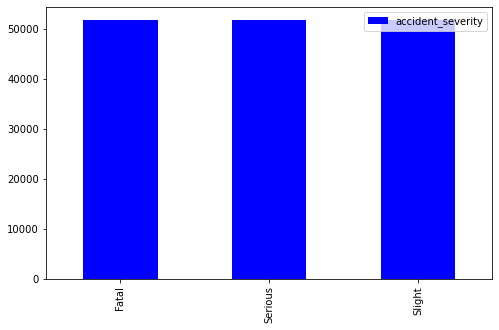

In [169]:
train_set=x_resampled
pd.DataFrame(train_set['accident_severity'].value_counts()).plot(kind="bar",figsize=(8,5),color="b")

In [170]:
train_set["accident_severity"].value_counts()

Fatal      51761
Serious    51761
Slight     51761
Name: accident_severity, dtype: int64

### Spliting Train and Test into Target and Predictor

After oversampling we need to again split the training and testing data into Tragets and predictors.After splitting we can build different classification model


In [171]:
Xtrain = train_set.drop("accident_severity", axis=1)
ytrain = train_set["accident_severity"].copy()

Xtest = test_set.drop("accident_severity", axis=1)
ytest = test_set["accident_severity"].copy()

In [172]:
# value count of the target variable
ytrain.value_counts()

Fatal      51761
Serious    51761
Slight     51761
Name: accident_severity, dtype: int64

# Building Models After OverSampling

## 3. Decision Tree Classifier

After Oversampling we can again build the Decision Tree Classifier to check if their is any improvement in the F-score for the minority classes i.e. for Fatal and Slight

Average F-score for the training model is 71% wheras for the accuracy is 56% which is lower than the previous Decision Tree Classifier model value, but if we check the F-score for the Fatal and Slight the values have increased slightly in comparison to the to previous Decision Tree Classifier.

In [276]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
dtree=DecisionTreeClassifier(max_depth=15)
model=dtree.fit(Xtrain,ytrain)
model

DecisionTreeClassifier(max_depth=15)

In [277]:
y_pred_train=dtree.predict(Xtrain)

In [278]:
y_hat=model.predict(Xtest)

### 3.1 Precision, Recall, F-score for the Train Data  After OverSampling

In [279]:
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s=precision_recall_fscore_support(ytrain,y_pred_train,average="macro")
print(p,r,f)

0.86487887546647 0.48645855293503165 0.5480034011940046


### 3.2 Precision, Recall, F-Score for the Test Data After OverSampling

In [280]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_hat))
print(classification_report(ytest, y_hat))

[[    4    23   209]
 [   26   246  2939]
 [   36   653 12206]]
              precision    recall  f1-score   support

       Fatal       0.06      0.02      0.03       236
     Serious       0.27      0.08      0.12      3211
      Slight       0.79      0.95      0.86     12895

    accuracy                           0.76     16342
   macro avg       0.37      0.35      0.34     16342
weighted avg       0.68      0.76      0.71     16342



## 4. Random Forest After Oversampling

Best score for training set after oversampling is 80 % which is significantly improved from all the previous model. Score comparision with the Cross validation score is also almst similar.

### 4.1 Building the Model

In [178]:
import time

In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=7)

# specify the hyperparameters and their values
param_grid = [
    {'n_estimators': [10,100,200,1000],
     'max_depth': [5,10,15],
    'min_samples_split':[5,10]}
]

os_grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
os_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 3932.4686472415924 seconds


In [180]:
os_grid_search.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=1000,
                       random_state=7)

### 4.2 Accuracy Score on Train Data

In [181]:
Randomforest=os_grid_search.best_score_
Randomforest

0.8048621413663172

In [258]:
yhat=os_grid_search.predict(Xtest)
p, r, f,s = precision_recall_fscore_support(ytest, yhat, average="macro")

print(p,r,f) 

0.38237468400012514 0.4301243962859189 0.38344402529377053


### 4.3 Score Comparison with Cross validation Score

In [201]:
cv_results = pd.DataFrame(os_grid_search.cv_results_)[['mean_train_score', 'mean_test_score','params']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,mean_train_score,mean_test_score,params,"diff, %"
19,0.855017,0.804862,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 1000}",5.865977
18,0.855109,0.804847,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}",5.877837
17,0.853530,0.803515,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}",5.859747
22,0.846342,0.797325,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}",5.791646
23,0.846941,0.797179,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 1000}",5.875576
21,0.844716,0.795572,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}",5.817816
16,0.822363,0.774400,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 10}",5.832294
20,0.808553,0.762944,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 10}",5.640907
11,0.625166,0.611171,"{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 1000}",2.238579
14,0.624826,0.610662,"{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}",2.266920


### 4.3 Feature Importance Base on Random Forest

In [202]:
#feature importance of the variables in Random Forest
feature_importances = os_grid_search.best_estimator_.feature_importances_

for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

latitude: 0.19275549436365388
longitude: 0.18709209396286636
speed_limit: 0.10796875862092811
number_of_vehicles: 0.07388391957217257
number_of_casualties: 0.05140270108342426
junction_detail_Not at junction or within 20 metres: 0.030513339942487606
first_road_class_Unclassified: 0.02258717944674059
road_surface_conditions_Wet or damp: 0.020009005415593837
light_conditions_Daylight: 0.017479516832612542
day_of_week_Thursday: 0.017167412575128285
light_conditions_Darkness - no lighting: 0.016373710444547915
road_type_Single Carriageway: 0.015846713855737597
day_of_week_Tuesday: 0.015253716142817978
day_of_week_Wednesday: 0.015034052511687232
day_of_week_Monday: 0.01498987523546321
weather_conditions_Fine no high winds: 0.014928205491505132
first_road_class_B: 0.014816772576057657
day_of_week_Sunday: 0.01471290147835336
day_of_week_Saturday: 0.014218581452574751
junction_detail_T or staggered junction: 0.013156293731650582
pedestrian_crossing_physical_facilities_No physical crossing faci

### 4.3 F1 Score and Accuracy on Test Data after Over Sampling

In [217]:
# Random Forest oversampling
Randomforest_test=evaluate_on_test(os_grid_search.best_estimator_, ytest, Xtest)

              precision    recall  f1-score   support

       Fatal       0.05      0.25      0.08       236
     Serious       0.27      0.29      0.28      3211
      Slight       0.83      0.75      0.79     12895

    accuracy                           0.65     16342
   macro avg       0.38      0.43      0.38     16342
weighted avg       0.71      0.65      0.68     16342



### 4.4 Confusion Matrix Random Forest---Train Data

Random forest has the best score of 80% and we can see in the confusion matrix that model is able to identify all the class of the target variable i.e. Fatal, Serious and Slight. We can see that any class is not missclassified with a huge perecentage.

The True Label percentage for Fatal is 98%, for Serious it is 74% and for Slight it 85%

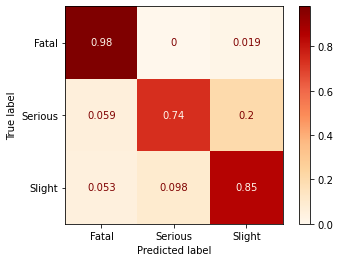

In [203]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
y_pred = os_grid_search.predict(Xtrain)
conf_mat = confusion_matrix(ytrain, y_pred, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                       display_labels=os_grid_search.best_estimator_.classes_
                      ).plot(cmap=plt.cm.OrRd)

### 4.5 Confusion Matrix Random Forest--Test Data

The results are not similar to train set as it is not able to identify Fatal with good accuracy as in train set. For severity as Fatal, model is able to identify with 25% True Label.Model is performing well on training data but not on testing data we can say our model is overfitted.

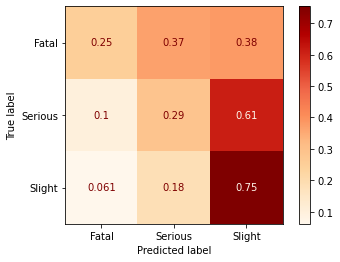

In [204]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
y_pred = os_grid_search.predict(Xtest)
conf_mat = confusion_matrix(ytest, y_pred, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                       display_labels=os_grid_search.best_estimator_.classes_
                      ).plot(cmap=plt.cm.OrRd)

## 5. Random Forest Using Randomized Search after Oversampling

In [182]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=7)

param_grid = [
    {'n_estimators': [10,100,200,1000],
     'max_depth': [5,10,15],
    'min_samples_split':[5,10]}
]

rf_RandomGrid=RandomizedSearchCV(estimator=rf,param_distributions=param_grid,scoring='f1_macro',cv=10,verbose=2,n_jobs=4)

rf_RandomGrid.fit(Xtrain,ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=7),
                   n_jobs=4,
                   param_distributions=[{'max_depth': [5, 10, 15],
                                         'min_samples_split': [5, 10],
                                         'n_estimators': [10, 100, 200, 1000]}],
                   verbose=2)

In [183]:
rf_RandomGrid.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=1000,
                       random_state=7)

### 5.1 Accuracy on Training data 

In [228]:
RandomForest_Randomizedsearch=rf_RandomGrid.best_score_
RandomForest_Randomizedsearch

0.8045312435668632

### 5.2 Accuracy on the Test data

In [218]:
RandomForest_Randomizedsearch_test=evaluate_on_test(rf_RandomGrid.best_estimator_, ytest, Xtest)

              precision    recall  f1-score   support

       Fatal       0.05      0.24      0.08       236
     Serious       0.27      0.29      0.28      3211
      Slight       0.83      0.75      0.79     12895

    accuracy                           0.65     16342
   macro avg       0.38      0.43      0.38     16342
weighted avg       0.71      0.65      0.68     16342



## 6 SVM

### 6.1 Builiding the Model

In [188]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

lsvm = LinearSVC(random_state=7)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'max_iter': [5000]
}

svm_grid_search = GridSearchCV(lsvm, param_grid, cv=5, scoring='f1_macro', return_train_score=True) 

start = time.time()
svm_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Took 4001.841055870056 seconds


In [192]:
svm_grid_search.fit(Xtrain, ytrain)

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

GridSearchCV(cv=5, estimator=LinearSVC(random_state=7),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'max_iter': [5000]},
             return_train_score=True, scoring='f1_macro')

In [195]:
svm_grid_search.best_estimator_

LinearSVC(C=0.1, max_iter=5000, random_state=7)

### 6.1 F1 Score on Training Data

In [196]:
SVM=svm_grid_search.best_score_
SVM

0.4647306198426918

### 6.2 Evaluation on Test Data

In [219]:
# SVM after oversampling
SVM_test=evaluate_on_test(svm_grid_search.best_estimator_, ytest, Xtest)

              precision    recall  f1-score   support

       Fatal       0.03      0.64      0.06       236
     Serious       0.22      0.21      0.21      3211
      Slight       0.84      0.57      0.67     12895

    accuracy                           0.50     16342
   macro avg       0.36      0.47      0.32     16342
weighted avg       0.70      0.50      0.58     16342



###  6.3 Confusion Matrix for SVM---Train Data

On traning Set SVM is able to identify severity as Fatal 66% and for serious it very low to 23% 

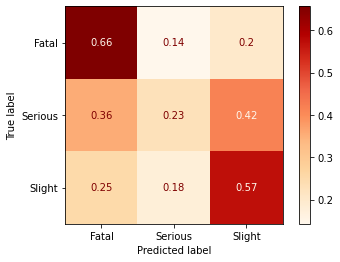

In [197]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
y_pred = svm_grid_search.predict(Xtrain)
conf_mat = confusion_matrix(ytrain, y_pred, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                       display_labels=svm_grid_search.best_estimator_.classes_
                      ).plot(cmap=plt.cm.OrRd)

### 6.4 Confusion Matrix SVM for Test data

We can see from the confusion matrix that accuracy of identifying accident severity as fatal is 64% ,Serious is 21%  and Slight is 57%. Whereas Slight is missclassified as Serious 47 % which is a lot. 
The SVM is able to identify Fatal most accurately than any other class

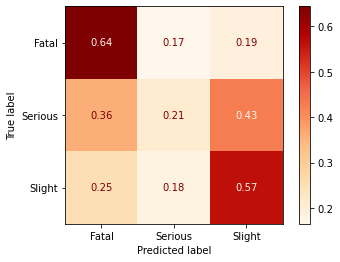

In [281]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
y_pred = svm_grid_search.predict(Xtest)
conf_mat = confusion_matrix(ytest, y_pred, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                       display_labels=svm_grid_search.best_estimator_.classes_
                      ).plot(cmap=plt.cm.OrRd)

## 7. Multinomial Logistic Regression

Build the Multinomial Logistic Regression to see if we can get better accuracy in comparison to other output

In [128]:
from sklearn.linear_model import LogisticRegression

logmodal=LogisticRegression(solver='lbfgs')

param_grid = {
    'C':[0.001,0.01,0.1],
    'max_iter':[100,1000,2500]
    }

logis_grid_search = GridSearchCV(logmodal, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
logis_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

C:\Users\abhin\anaconda3\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:459: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abhin\anaconda3\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:459: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Took 159.28134274482727 seconds


In [129]:
logis_grid_search.best_estimator_

LogisticRegression(C=0.1, max_iter=1000)

### 7.1 F1-score Logistic on Training Data

In [130]:
Logistic=logis_grid_search.best_score_
Logistic

0.47196283815897233

### 7.2 Evaluation on Test Data

In [220]:
# Logistic Regression
Logistic_test=evaluate_on_test(logis_grid_search.best_estimator_, ytest, Xtest)

              precision    recall  f1-score   support

       Fatal       0.03      0.61      0.07       236
     Serious       0.22      0.26      0.24      3211
      Slight       0.84      0.54      0.66     12895

    accuracy                           0.49     16342
   macro avg       0.36      0.47      0.32     16342
weighted avg       0.70      0.49      0.57     16342



F1 score abtained from training data with Multinomial Logistic Model is 47% and with test data it is 32%.

In [148]:
def evaluate_on_test(model, ytest, Xtest):
    yhat = model.predict(Xtest)
    print(classification_report(ytest, yhat))

## Pickling the model into the Local Directly

In [94]:
import os
from joblib import dump
# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")

In [95]:
dump(Randomforest, 'models/rf-clf.joblib')

['models/rf-clf.joblib']

In [ ]:
dump(SVM, 'models/svm-clf.joblib')

In [96]:
from joblib import load
best_rf=load('models/rf-clf.joblib')
best_rf

0.8048621413663172

In [50]:
svm=load('models/svm-clf.joblib')
svm

['models/svm-clf.joblib']

In [267]:
f1_score={
    'Baseline':[f],
    'Decision Tree Classifier':[Decisiontree],
    'Random Forest After OverSampling':[Randomforest],
    'RandomForest_Randomizedsearch':[RandomForest_Randomizedsearch],
    'SVM After OverSampling':[SVM],
    'Logistics Regression':[Logistic]
}

score=pd.DataFrame(f1_score).transpose()
score.columns=['f1_score']
score['Percentage Improvement']=100*(score["f1_score"]-f)/f
score


,f1_score,Percentage Improvement
Baseline,0.294012,0.000000
Decision Tree Classifier,0.717735,144.117300
Random Forest After OverSampling,0.804862,173.751246
RandomForest_Randomizedsearch,0.804531,173.638700
SVM After OverSampling,0.464731,58.065064
Logistics Regression,0.471963,60.524900
